In [27]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing, .csv file I/O
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from pprint import pprint

In [16]:
train = pd.read_csv('./data/train.csv', header=None)
train_label = pd.read_csv('./data/trainLabels.csv', header=None)
test = pd.read_csv('./data/test.csv', header=None)

In [17]:
print('train shape: {}'.format(train.shape))
print('test shape: {}'.format(test.shape))
print('train_label shape: {}'.format(train_label.shape))

train shape: (1000, 40)
test shape: (9000, 40)
train_label shape: (1000, 1)


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

In [20]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


### Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

data, target = train, np.ravel(train_label)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, stratify=target)

In [29]:
rfc = RandomForestClassifier()
print('Parameters:')
pprint(rfc.get_params())

Parameters:
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [38]:
gbc = GradientBoostingClassifier()
print('Parametes:')
pprint(gbc.get_params())
gbc.fit(x_train, y_train)
print('\ntrain score: {}'.format(gbc.score(x_train, y_train)))
print('\nval_score: {}'.format(np.mean(cross_val_score(gbc, x_train, y_train))))

Parametes:
{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

train score: 0.992

val_score: 0.8439823997183954


    add feature scaling

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

std = StandardScaler()
data_std = std.fit_transform(data)
mms = MinMaxScaler()
data_mms = mms.fit_transform(data)
norm = Normalizer()
data_norm = norm.fit_transform(data)

In [51]:
rate_of_learning = np.arange(0.05, 0.15, 0.01)
kfold = 10
## train_accuracy = list()
val_accuracy = {'std': list(), 'mms':list(), 'norm':list()}
bestGBC = None
bestAcc = 0.0
bestScale = None

for i, rate in enumerate(rate_of_learning):
    # rate
    gbc = GradientBoostingClassifier(learning_rate=rate)
    # fit with gbc
    gbc.fit(x_train, y_train)
    # train accuracy
    ## train_accuracy.append(gbc.score(x_train, y_train))
    # test_accuracy
    std_score = np.mean(cross_val_score(gbc, data_std, target, cv=kfold))
    val_accuracy['std'].append(std_score)
    
    mms_score = np.mean(cross_val_score(gbc, data_mms, target, cv=kfold))
    val_accuracy['mms'].append(mms_score)
    
    norm_score = np.mean(cross_val_score(gbc, data_norm, target, cv=kfold))
    val_accuracy['norm'].append(norm_score)
    
    if std_score > bestAcc:
        bestAcc = std_score
        bestGBC = gbc
        bestScale = 'StandardScaler'
    elif mms_score > bestAcc:
        bestAcc = mms_score
        bestGBC = gbc
        bestScale = 'MinMaxScaler'
    elif norm_score > bestAcc:
        bestAcc = norm_score
        bestGBC = gbc
        bestScale = 'Normalizer'

print('Best Accuracy without Feature Scaling:', bestAcc)
print(bestGBC)

Best Accuracy without Feature Scaling: 0.884
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


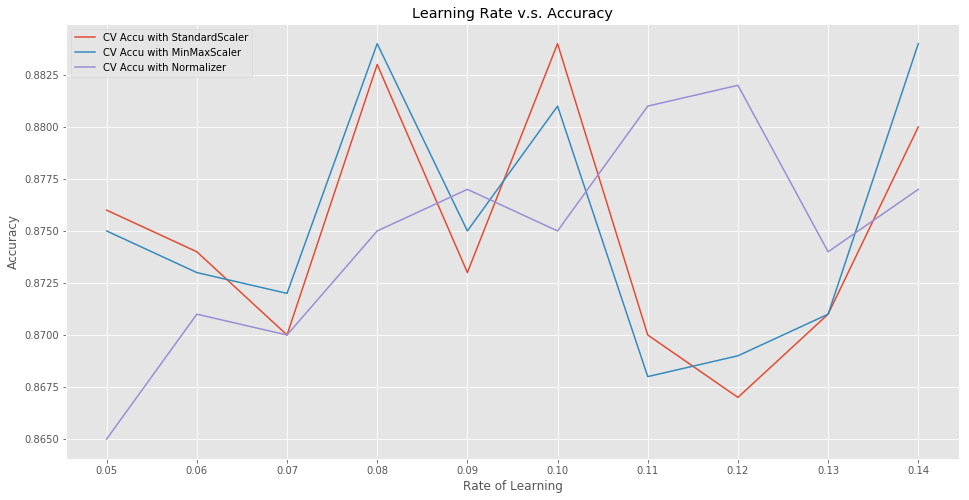

In [53]:
# plot
plt.figure(figsize=(16, 8))
## plt.plot(rate_of_learning, train_accuracy, label='Training Accuracy')
plt.plot(rate_of_learning, val_accuracy['std'], label='CV Accu with StandardScaler')
plt.plot(rate_of_learning, val_accuracy['mms'], label='CV Accu with MinMaxScaler')
plt.plot(rate_of_learning, val_accuracy['norm'], label='CV Accu with Normalizer')
plt.legend()
plt.title('Learning Rate v.s. Accuracy')
plt.xlabel('Rate of Learning')
plt.ylabel('Accuracy')
plt.xticks(rate_of_learning)
plt.show()

In [58]:
gbc = GradientBoostingClassifier(learning_rate=0.08)
gbc.fit(data_mms, target)
test_fill = np.nan_to_num(test)
submission = pd.DataFrame(bestGBC.predict(test_fill))
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1, submission.shape[0]+1)
submission = submission[['Id', 'Solution']]

(9000, 1)


# predict test
test_fill = np.nan_to_num(test)
submission = pd.DataFrame(bestGBC.predict(test_fill))
print(submission.shape)
submission.columns = ['Solution']
submission['Id'] = np.arange(1, submission.shape[0]+1)
submission = submission[['Id', 'Solution']]
submission

In [59]:
# to_csv
submission.to_csv('submission.csv', index=False)

#### Feature Selection (之後學)